In [2]:
# Importo las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

# Directorio donde voy a trabajar
os.chdir("D:/Teclab/datos/api4/ARCHIVOS/")

In [3]:
# Cargar los datos
df_empleo = pd.read_csv("empleo.csv", encoding = "latin-1")
df_esperanza_de_vida = pd.read_csv("esperanza_de_vida.csv", encoding = "latin-1")
df_exportaciones = pd.read_excel("bases para apis.xlsx", sheet_name="exportaciones")
df_hogares_viviendas = pd.read_csv("hogares_viviendas_superficie.csv", encoding = "latin-1")
df_poblacion = pd.read_csv("poblacion.csv", encoding = "latin-1")

In [4]:
df_empleo.head(15)

,provincia,anio,mes,empleados_registrados_miles
0,Buenos Aires,2009,ene-09,1787.640
1,Buenos Aires,2009,feb-09,1769.223
2,Buenos Aires,2009,mar-09,1745.913
3,Buenos Aires,2009,abr-09,1729.917
4,Buenos Aires,2009,may-09,1723.218
5,Buenos Aires,2009,jun-09,1724.903
6,Buenos Aires,2009,jul-09,1722.949
7,Buenos Aires,2009,ago-09,1720.649
8,Buenos Aires,2009,sep-09,1727.501
9,Buenos Aires,2009,oct-09,1741.995


In [5]:
df_empleo.dtypes

provincia                       object
anio                             int64
mes                             object
empleados_registrados_miles    float64
dtype: object

In [6]:
# agrupamos por provincia y año el df de empleo
df_empleo_año = df_empleo.groupby(["provincia", "anio"], as_index = False).agg({"empleados_registrados_miles":"mean"})
df_empleo_año

,provincia,anio,empleados_registrados_miles
0,Buenos Aires,2009,1743.478250
1,Buenos Aires,2010,1790.238750
2,Buenos Aires,2011,1871.866000
3,Buenos Aires,2012,1915.155333
4,Buenos Aires,2013,1929.993917
...,...,...,...
307,Tucumán,2017,167.544167
308,Tucumán,2018,172.352333
309,Tucumán,2019,169.634917
310,Tucumán,2020,164.516417


In [7]:
df_empleo_año2020 = df_empleo_año[df_empleo_año["anio"] == 2020]
df_empleo_año2020.head()

,provincia,anio,empleados_registrados_miles
11,Buenos Aires,2020,1844.903833
24,Capital Federal,2020,1431.688833
37,Catamarca,2020,26.943667
50,Chaco,2020,69.923333
63,Chubut,2020,93.258583


In [8]:
df_esperanza_de_vida_2020 = df_esperanza_de_vida[df_esperanza_de_vida["anio"] == 2020]
df_esperanza_de_vida_2020.head()

,provincia,anio,mujeres,varones
1,Buenos Aires,2020,81.34,74.74
7,Catamarca,2020,81.45,75.78
13,Chaco,2020,79.71,73.03
19,Chubut,2020,82.28,75.05
25,Capital Federal,2020,82.60,76.36


C:\Users\Izzy\AppData\Local\Temp\ipykernel_9644\1552717763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_esperanza_de_vida_2020["promedio_MV"] = (df_esperanza_de_vida_2020["mujeres"] + df_esperanza_de_vida_2020["varones"]) / 2


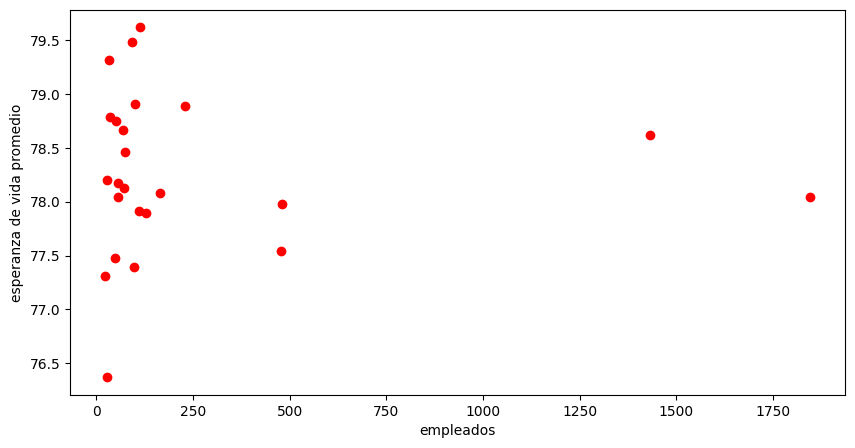

array([[ 1.        , -0.00832541],
       [-0.00832541,  1.        ]])

In [9]:
df_esperanza_de_vida_2020["promedio_MV"] = (df_esperanza_de_vida_2020["mujeres"] + df_esperanza_de_vida_2020["varones"]) / 2
df_esperanza_de_vida_2020.head()
plt.figure ( figsize = (10, 5))
plt.scatter (df_empleo_año2020["empleados_registrados_miles"], df_esperanza_de_vida_2020["promedio_MV"], color = "red")
plt.xlabel("empleados")
plt.ylabel("esperanza de vida promedio")
plt.show()
np.corrcoef(df_empleo_año2020["empleados_registrados_miles"], df_esperanza_de_vida_2020["promedio_MV"])

In [10]:
df_exportaciones_año = df_exportaciones[(df_exportaciones["rubro"] != "Total") & (df_exportaciones["provincia"] != "Total País")]
df_exportaciones_año.head(10)


,rubro,provincia,anio,value
26,Productos primarios,Buenos Aires,2005,2116.442
27,Productos primarios,Capital Federal,2005,0
28,Productos primarios,Córdoba,2005,1411.687
29,Productos primarios,Entre Ríos,2005,485.317
30,Productos primarios,La Pampa,2005,187.538
31,Productos primarios,Santa Fe,2005,1028.697
32,Productos primarios,Chubut,2005,177.371
33,Productos primarios,Neuquén,2005,38.08
34,Productos primarios,Río Negro,2005,251.661
35,Productos primarios,Santa Cruz,2005,151.134


In [11]:
df_exportaciones_año.dtypes

rubro        object
provincia    object
anio          int64
value        object
dtype: object

In [12]:
df_exportaciones.tail(15)

,rubro,provincia,anio,value
1985,Combustibles y energía,Santa Cruz,2020,231.49
1986,Combustibles y energía,Tierra del Fuego,2020,82.208
1987,Combustibles y energía,Catamarca,2020,0
1988,Combustibles y energía,Jujuy,2020,0
1989,Combustibles y energía,La Rioja,2020,0
1990,Combustibles y energía,Salta,2020,19.106
1991,Combustibles y energía,Santiago del Estero,2020,0
1992,Combustibles y energía,Tucumán,2020,1.498
1993,Combustibles y energía,Mendoza,2020,33.993
1994,Combustibles y energía,San Juan,2020,0


In [13]:
df_exportaciones_año = df_exportaciones_año[df_exportaciones_año["value"] != "-"]
df_exportaciones_año


,rubro,provincia,anio,value
26,Productos primarios,Buenos Aires,2005,2116.442
27,Productos primarios,Capital Federal,2005,0
28,Productos primarios,Córdoba,2005,1411.687
29,Productos primarios,Entre Ríos,2005,485.317
30,Productos primarios,La Pampa,2005,187.538
...,...,...,...,...
1995,Combustibles y energía,San Luis,2020,0
1996,Combustibles y energía,Chaco,2020,0
1997,Combustibles y energía,Corrientes,2020,373.938
1998,Combustibles y energía,Formosa,2020,5.169


In [14]:
df_exportaciones_año = df_exportaciones_año.drop(columns = "rubro")

In [15]:
df_exportaciones_año_2 = df_exportaciones_año.groupby(["provincia", "anio"], as_index = False).agg({"value":"mean"})
df_exportaciones_año = df_exportaciones_año_2[df_exportaciones_año_2["value"] != 0]
df_exportaciones_año_2

,provincia,anio,value
0,Buenos Aires,2005,3906.71625
1,Buenos Aires,2006,4457.28925
2,Buenos Aires,2007,5191.9715
3,Buenos Aires,2008,6254.496
4,Buenos Aires,2009,4593.58125
...,...,...,...
379,Tucumán,2016,300.638
380,Tucumán,2017,262.846
381,Tucumán,2018,279.214
382,Tucumán,2019,237.974


In [16]:
df_empleo_año.head()


,provincia,anio,empleados_registrados_miles
0,Buenos Aires,2009,1743.478250
1,Buenos Aires,2010,1790.238750
2,Buenos Aires,2011,1871.866000
3,Buenos Aires,2012,1915.155333
4,Buenos Aires,2013,1929.993917


In [17]:

df_empleo_exportaciones = pd.merge(df_exportaciones_año_2, df_empleo_año, left_on = ["provincia", "anio"], right_on = ["provincia", "anio"], how = "inner")
df_empleo_exportaciones

,provincia,anio,value,empleados_registrados_miles
0,Buenos Aires,2009,4593.58125,1743.478250
1,Buenos Aires,2010,5717.373,1790.238750
2,Buenos Aires,2011,7004.42075,1871.866000
3,Buenos Aires,2012,6853.58025,1915.155333
4,Buenos Aires,2013,6384.24675,1929.993917
...,...,...,...,...
283,Tucumán,2016,300.638,163.981667
284,Tucumán,2017,262.846,167.544167
285,Tucumán,2018,279.214,172.352333
286,Tucumán,2019,237.974,169.634917


KeyError: 'None of [RangeIndex(start=0, stop=288, step=1)] are in the [columns]'

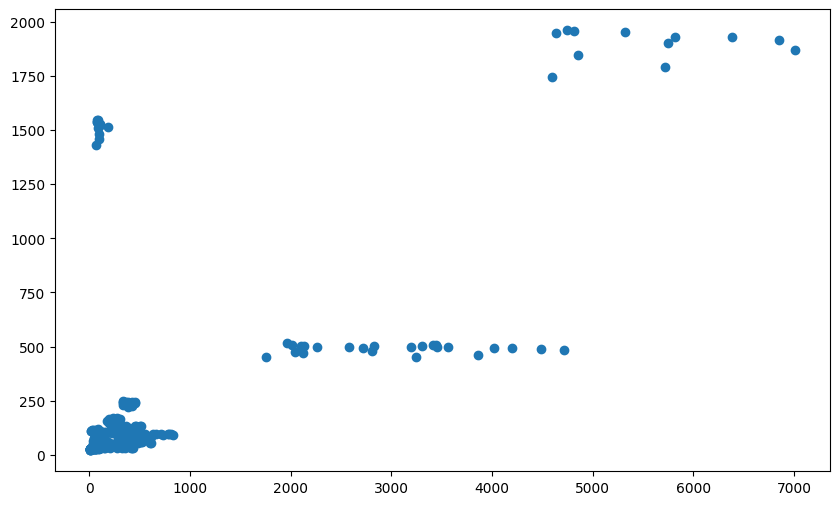